## 1. 张量

In [1]:
import tensorflow as tf
print(tf.__version__)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.5.0


In [2]:
import numpy as np


###  1. 在 tensorflow中创建张量

In [3]:
row_dim = 4
col_dim = 3
sess = tf.Session()
zero_tsr = tf.zeros([row_dim,col_dim],dtype=np.float32)
print("The {} function give us:".format("tf.zeros([row_dim,col_dim],dtype=np.float32)"))
print(sess.run(zero_tsr))
ones_tsr = tf.ones([row_dim,col_dim])
print("The {} function give us:".format("tf.ones([row_dim,col_dim])"))
print(sess.run([ones_tsr]))
filled_tsr = tf.fill([row_dim,col_dim],42)
print("The {} function give us:".format("tf.fill([row_dim,col_dim],42)"))
print(sess.run(filled_tsr))
constant_tsr = tf.constant([1,2,3])
print("The {} function give us:".format("constant_tsr = tf.constant([1,2,3])"))
print(sess.run(constant_tsr))
constant_tsr = tf.constant(42,dtype=tf.float32,shape=[row_dim,col_dim])
print("The {} function give us:".format("constant_tsr = tf.constant(42,dtype=tf.float32,shape=[row_dim,col_dim])"))
print(sess.run(constant_tsr))

The tf.zeros([row_dim,col_dim],dtype=np.float32) function give us:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
The tf.ones([row_dim,col_dim]) function give us:
[array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)]
The tf.fill([row_dim,col_dim],42) function give us:
[[42 42 42]
 [42 42 42]
 [42 42 42]
 [42 42 42]]
The constant_tsr = tf.constant([1,2,3]) function give us:
[1 2 3]
The constant_tsr = tf.constant(42,dtype=tf.float32,shape=[row_dim,col_dim]) function give us:
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


###  2. 在 tensorflow中创建形状相似的张量

In [4]:
zeros_similar = tf.zeros_like(constant_tsr)
print("The {} function give us:".format("zeros_similar = tf.zeros_like(constant_tsr)"))
print(sess.run(zeros_similar))

ones_similar = tf.ones_like(constant_tsr)
print("The {} function give us:".format("ones_similar = tf.ones_like(constant_tsr)"))
print(sess.run(ones_similar))

The zeros_similar = tf.zeros_like(constant_tsr) function give us:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
The ones_similar = tf.ones_like(constant_tsr) function give us:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


###  3. 在 tensorflow中创建序列张量

In [5]:
linear_tsr = tf.linspace(start=0.,stop=1.,num=3)
print(sess.run(linear_tsr))


[0.  0.5 1. ]


In [6]:
integer_seq_tsr = tf.range(start=6, limit=15, delta=3)
print(sess.run(integer_seq_tsr))

[ 6  9 12]


###  4. 在 tensorflow中创建随机张量

In [7]:
randunif_tsr = tf.random_uniform(shape=[row_dim,col_dim],minval=0,maxval=1)
xx = sess.run(randunif_tsr)
print(xx)
xx = tf.random_shuffle(xx)
print(sess.run(xx))

[[0.02524543 0.32264936 0.41401494]
 [0.29117846 0.66846097 0.19103098]
 [0.03692651 0.2035023  0.81115305]
 [0.9122542  0.12443721 0.59971726]]
[[0.02524543 0.32264936 0.41401494]
 [0.03692651 0.2035023  0.81115305]
 [0.29117846 0.66846097 0.19103098]
 [0.9122542  0.12443721 0.59971726]]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


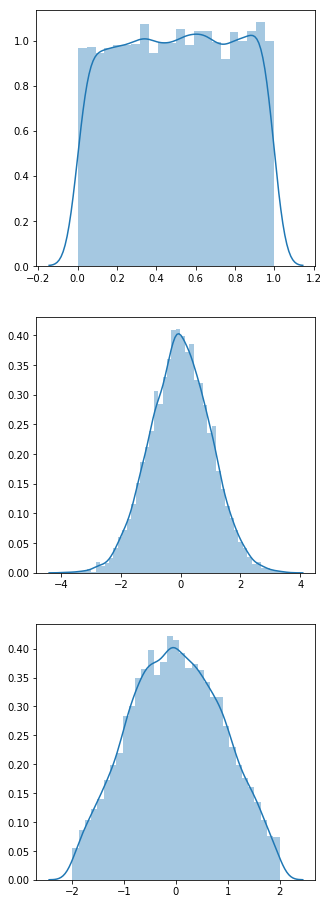

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

fig,ax = plt.subplots(3,1,figsize=(5,16))

rand_tsr = tf.random_uniform(shape=[100,100],minval=0,maxval=1)
xx = sess.run(rand_tsr)
sb.distplot(xx.ravel(),ax=ax[0])

rand_tsr = tf.random_normal(shape=[100,100],mean=0.0, stddev=1.0)
xx = sess.run(rand_tsr)
sb.distplot(xx.ravel(),ax=ax[1])

rand_tsr = tf.truncated_normal(shape=[100,100],mean=0.0, stddev=1.0)
xx = sess.run(rand_tsr)
sb.distplot(xx.ravel(),ax=ax[2])

plt.show()

###  5. 将numpy ndarray转换为张量

In [9]:
convert_tsr = tf.convert_to_tensor(np.zeros([5,5]))
print(sess.run(convert_tsr))

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


## 2. 变量和占位符

In [10]:
my_var = tf.Variable(tf.zeros([row_dim, col_dim]))
initialize_op = tf.global_variables_initializer()
sess.run(initialize_op)
print(sess.run(my_var))




[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [11]:
x = tf.placeholder(tf.float32,shape=[2,2],name="x")
y = tf.identity(x)
z = tf.matmul(x, y)
x_vals = np.random.rand(2,2)
print(sess.run(y, feed_dict={x:x_vals}))
print(sess.run(z, feed_dict={x:x_vals}))

[[0.7433887 0.8250475]
 [0.5183665 0.3108472]]
[[0.98030376 0.8697947 ]
 [0.5464806  0.52430296]]


In [12]:
first_var = tf.Variable(tf.random_uniform(shape=(2,2)))
sess.run(first_var.initializer)
second_var = tf.Variable(tf.zeros_like(first_var))
print(first_var)
print(sess.run(first_var))
sess.run(second_var.initializer)
print(second_var)
print(sess.run(second_var))

<tf.Variable 'Variable_1:0' shape=(2, 2) dtype=float32_ref>
[[0.7823566  0.55937755]
 [0.42833853 0.41606593]]
<tf.Variable 'Variable_2:0' shape=(2, 2) dtype=float32_ref>
[[0. 0.]
 [0. 0.]]


## 3. 运算

In [13]:
import numpy as np
import tensorflow as tf
sess = tf.Session()
x_vals = np.random.normal(1,1,100)
noises = np.random.normal(0,0.1,100)

y_vals = x_vals*5+noises

x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1]))

my_output = tf.multiply(x_data,A)
loss = tf.square(my_output-y_target)

init = tf.initialize_all_variables()

sess.run(init)

my_opt = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_step = my_opt.minimize(loss)

for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x,y_target: rand_y})
    if (i+1) % 10 == 0:
        print("Step #" + str(i+1) + ', A = ' + str(sess.run(A)))
        print("Loss = " + str(sess.run(loss,feed_dict={x_data:rand_x,y_target:rand_y})))



Instructions for updating:
Use `tf.global_variables_initializer` instead.
Step #10, A = [4.4166336]
Loss = [0.2075451]
Step #20, A = [4.9637966]
Loss = [0.00371965]
Step #30, A = [4.9620275]
Loss = [0.00045182]
Step #40, A = [4.9621634]
Loss = [0.02992557]
Step #50, A = [4.960425]
Loss = [0.03115741]
Step #60, A = [4.9297557]
Loss = [0.00089028]
Step #70, A = [4.97839]
Loss = [0.00015917]
Step #80, A = [5.0263476]
Loss = [0.00602807]
Step #90, A = [4.964891]
Loss = [0.00408778]
Step #100, A = [5.015638]
Loss = [0.01164313]
